## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [60]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [61]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [62]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [63]:
cols_to_update = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

num_missing = (diabetes_data[cols_to_update] == 0).sum()

# report the results
print(num_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [64]:
# Replace zeros with NaN in the specified columns
print(diabetes_data[cols_to_update].dtypes)
diabetes_data[cols_to_update] = diabetes_data[cols_to_update].replace(0.0,np.nan)

num_missing = (diabetes_data[cols_to_update] == 0).sum()
# report the results
print(num_missing)

Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
dtype: object
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


**<font color='teal'> Plot histograms of each column. </font>**

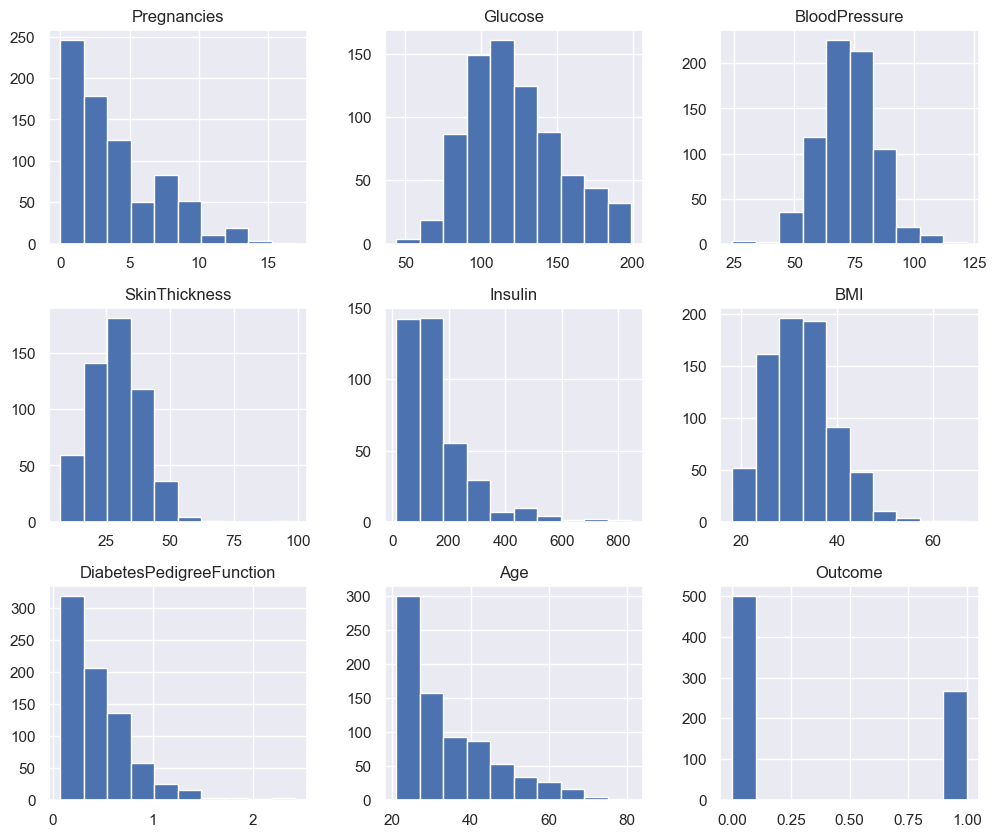

In [65]:
diabetes_data.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.show()

<Axes: ylabel='Frequency'>

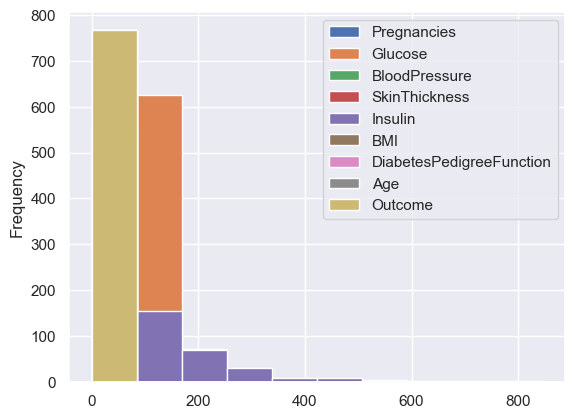

In [66]:
diabetes_data.plot(kind='hist')

#### Replace the zeros with mean and median values.

In [67]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

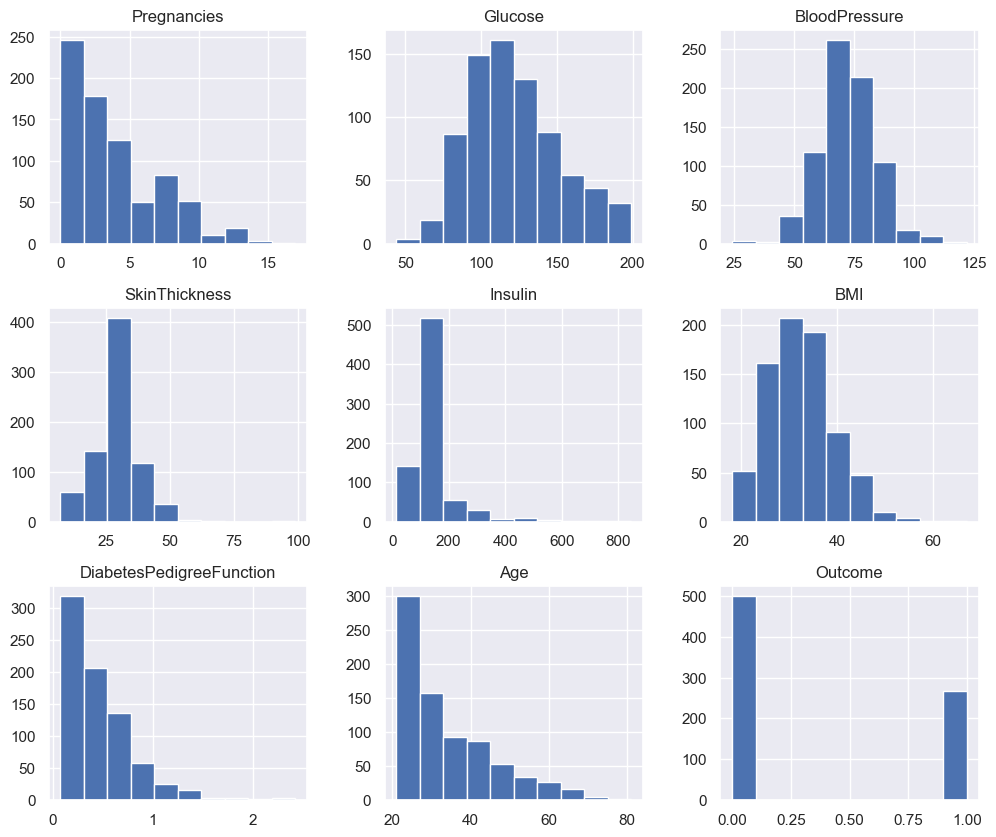

In [68]:
diabetes_data.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


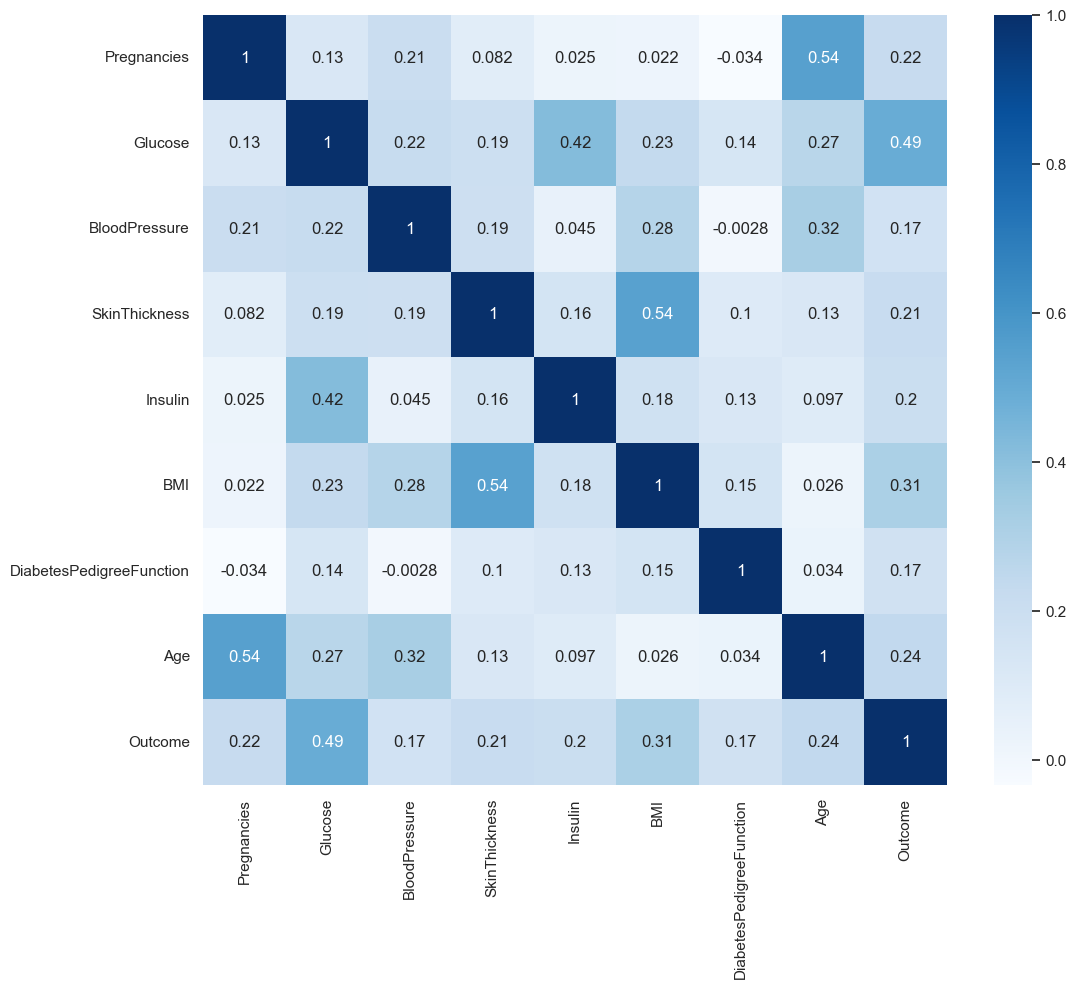

In [69]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [70]:
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome', axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=12)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [72]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [73]:
test_scores = []
train_scores = []
neighbors = range(1,10)
for i in neighbors:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train = knn.score(X_train,y_train)
    test = knn.score(X_test,y_test)
    train_scores.append(train)
    test_scores.append(test)
    print(i, "Train Score --", train)
    print(i, "Test Score --", test)

1 Train Score -- 1.0
1 Test Score -- 0.683982683982684
2 Train Score -- 0.8361266294227188
2 Test Score -- 0.696969696969697
3 Train Score -- 0.8566108007448789
3 Test Score -- 0.6666666666666666
4 Train Score -- 0.8212290502793296
4 Test Score -- 0.683982683982684
5 Train Score -- 0.8286778398510242
5 Test Score -- 0.7012987012987013
6 Train Score -- 0.8081936685288641
6 Test Score -- 0.7186147186147186
7 Train Score -- 0.8063314711359404
7 Test Score -- 0.70995670995671
8 Train Score -- 0.8044692737430168
8 Test Score -- 0.6796536796536796
9 Train Score -- 0.7932960893854749
9 Test Score -- 0.7056277056277056


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [74]:
print("Optimal number of neighbors for training data:", neighbors[train_scores.index(max(train_scores))])

Optimal number of neighbors for training data: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [75]:
print("Optimal number of neighbors for test data:", neighbors[test_scores.index(max(test_scores))])

Optimal number of neighbors for test data: 6


Plot the train and test model performance by number of neighbors.

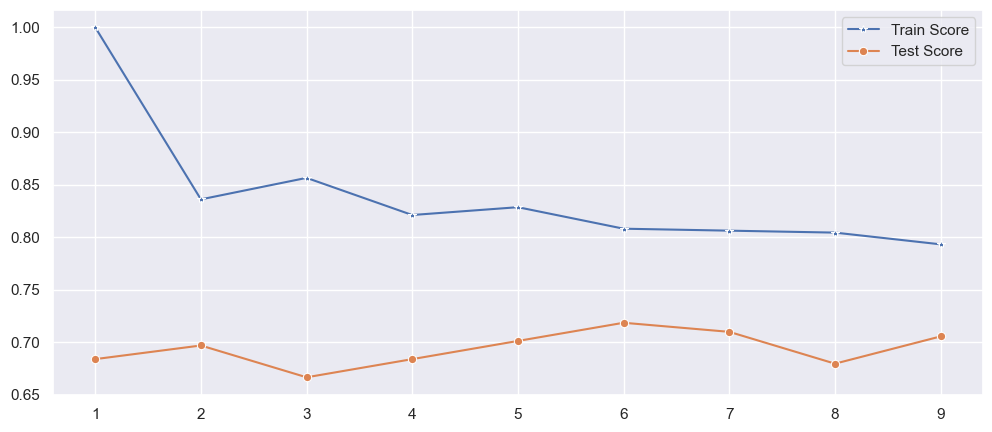

In [76]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [79]:
i = 9
knn = KNeighborsClassifier(i)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=9)

In [82]:
# y_pred = knn.predict(X_test)
# pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [83]:
y_pred = knn.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[127  20]
 [ 34  50]]


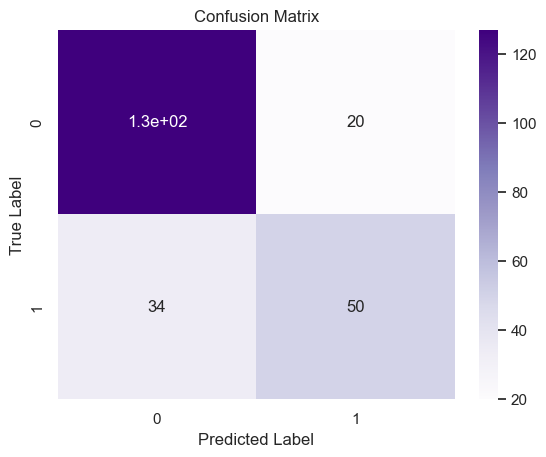

In [86]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Purples') 
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       147
           1       0.71      0.60      0.65        84

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [90]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [92]:
# Define the parameter grid for number of estimators
param_grid = {'n_estimators': np.arange(1,50)}  # Adjust range as needed

# Create a Random Forest Classifier object
rf = RandomForestClassifier()

# Perform GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit the model on your data (X, y)
rf_cv.fit(X, y)

# Print the best score and best parameter for n_estimators
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)

Best Score: 0.7695866225277991
Best Parameters: {'n_estimators': 11}


Within the explored parameter grid, a Random Forest model with 11 estimators achieved the best score of 0.7696.

**Grid Search:** GridSearchCV systematically evaluates different hyperparameter values (here, the number of estimators) to find the combination that leads to the best performance based on the chosen evaluation metric (likely accuracy in this case).

**Best Score:** 0.7696 signifies the highest accuracy (or other metric depending on your setup) achieved by a Random Forest model with 11 estimators on your specific dataset using a 5-fold cross-validation process.

**Best Parameters:** The identified optimal parameter is n_estimators=11. This doesn't necessarily mean it's the absolute best value, but it's the best configuration found within the defined grid (100 to 1000 in this case).

Key Points:
- GridSearchCV provides a good starting point for hyperparameter tuning, but it's essential to be aware of the limitations of the explored parameter grid.
- You might find even better performance by trying different ranges for n_estimators or exploring other hyperparameters relevant to Random Forests (e.g., max_depth, min_samples_split).
- Consider using techniques like RandomizedSearchCV for a more efficient exploration, especially when dealing with a large number of hyperparameters.

Next:
- Analyze the trade-off between model complexity (number of estimators) and performance. More estimators might lead to overfitting, so consider techniques like cross-validation to assess generalization.
- Try different ranges for n_estimators to see if there's a significant improvement beyond 11. Explore other hyperparameters to potentially fine-tune the model further.
- The best hyperparameters depend on your specific data and problem. GridSearchCV is a valuable tool for systematic exploration, but it's essential to interpret the results and iterate for optimal performance.